<a href="https://colab.research.google.com/github/zahranorozzadeh/DeepLearning45/blob/main/17_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Sep 22 04:32:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import os
import datetime
# !pip install wandb
import wandb
from wandb.keras import WandbCallback
import cv2
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten


In [5]:
dataset_path = "/content/drive/MyDrive/Datasets/Flowers"
width = height = 224
batch_size =16

#data augmentation
data_generator = ImageDataGenerator(
    rescale = 1./255,
    # horizontal_flip = True,
    # rotation_range = 20,
    # zoom_range = 0.1,
    validation_split = 0.2
)

train_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'Train'),
    target_size= (width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    subset='training'
)

val_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'Train'),
    target_size =(width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    subset='validation'
)

test_data = data_generator.flow_from_directory(
    os.path.join(dataset_path,'Test'),
    target_size =(width,height),
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True,
    )

Found 884 images belonging to 17 classes.
Found 204 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


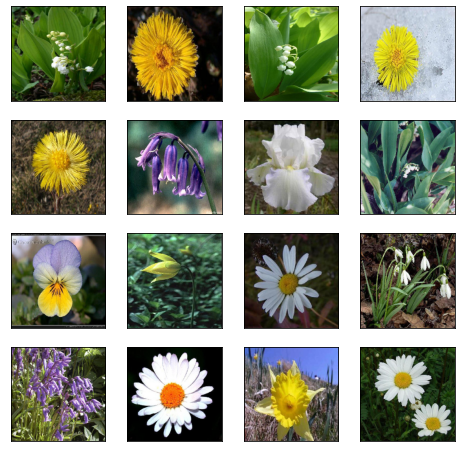

In [6]:
train_images = next(train_data)[0]
plt.figure(figsize=(8,8))#plot 16 images

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)

In [ ]:
# model1=tf.keras.applications.ResNet50(
#        input_shape=(width,height,3)
#    )

In [ ]:
# model1.summary()

In [ ]:
# model2=tf.keras.applications.ResNet50(
#        input_shape=(width,height,3),
#        include_top = False
# )

In [ ]:
# model2.summary()

In [11]:

base_model = tf.keras.applications.ResNet50V2(
    input_shape=(width, height, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
    )

94683136/94668760 [==============================] - 1s 0us/step


In [12]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
#freeze
# for layer in base_model.layers:
#   layer.trainable = False

In [13]:
model = tf.keras.Sequential([
      base_model,
      # layers.Flatten(),
      # layers.Dense(1024, activation = 'relu'),
      # layers.Dense(128, activation = 'relu'),
      layers.Dense(17, activation = 'softmax'),
       

])

In [14]:
wandb.init(project="17-flowers-classification")
config = wandb.config
config.learning_rate = 0.001

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [15]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
    metrics = 'accuracy'
)

In [16]:
model.fit(train_data,
          steps_per_epoch=train_data.samples/batch_size, #884/16
          validation_data = val_data,
          validation_steps= val_data.samples/batch_size, #204/16
          epochs=10,
          # callbacks=[WandbCallback()]
          )
   


Epoch 1/10
55/55 [==============================] - 327s 5s/step - loss: 4.0350 - accuracy: 0.3948 - val_loss: 47.2786 - val_accuracy: 0.0833
Epoch 2/10
55/55 [==============================] - 23s 412ms/step - loss: 1.5498 - accuracy: 0.6425 - val_loss: 20.9961 - val_accuracy: 0.2255
Epoch 3/10
55/55 [==============================] - 23s 409ms/step - loss: 1.1705 - accuracy: 0.7127 - val_loss: 39.2315 - val_accuracy: 0.2010
Epoch 4/10
55/55 [==============================] - 23s 409ms/step - loss: 1.2392 - accuracy: 0.7432 - val_loss: 63.8337 - val_accuracy: 0.2059
Epoch 5/10
55/55 [==============================] - 23s 409ms/step - loss: 0.8078 - accuracy: 0.8133 - val_loss: 5.4513 - val_accuracy: 0.4559
Epoch 6/10
55/55 [==============================] - 23s 408ms/step - loss: 0.6321 - accuracy: 0.8597 - val_loss: 2.3314 - val_accuracy: 0.5980
Epoch 7/10
55/55 [==============================] - 23s 409ms/step - loss: 0.5889 - accuracy: 0.8982 - val_loss: 4.2613 - val_accuracy: 0.59

In [17]:

model.evaluate(test_data)

17/17 [==============================] - 67s 4s/step - loss: 3.5785 - accuracy: 0.6250


[3.578514337539673, 0.625]